# Polynomial Regression

I have imported library numpy for mathmatical calculation, Pandas for dataframe functionality, matplotlib for visualising result and seaborn for producing statistical graph.

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns 
%matplotlib inline

## Importing datafile 

Checking and understanding dataset, statistical analysis of dataset to know insights

In [5]:
# Importing the dataset using read function of pandas.
dataset = pd.read_csv('Position_Salaries.csv')

Checking and understanding dataset

In [6]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [8]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [9]:
dataset.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

## EDA

Creating some simple plots to check out the data and understanding the statistical relationship of attributes. Exploring these types of relationships across the entire data set.

Using seaborn pairplot library function to represent graph.

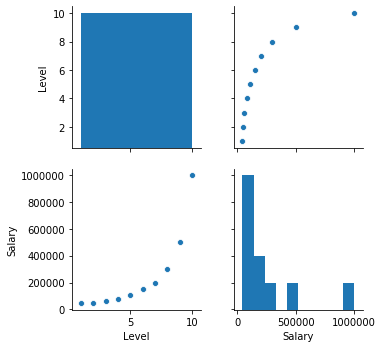

In [10]:
sns.pairplot(dataset)

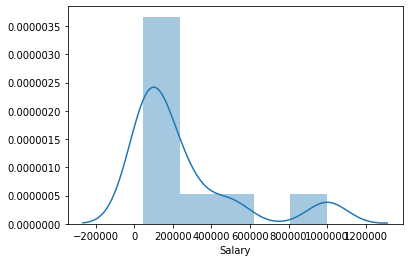

In [12]:
sns.distplot(dataset['Salary'])

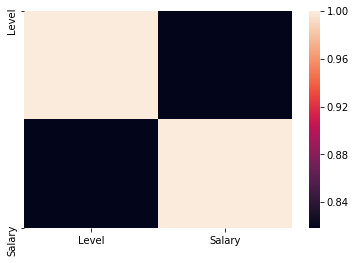

In [13]:
sns.heatmap(dataset.corr())

## Training a Polynomial Model

I need to first split up our data into an X array that contains the features to train on in the case of Polynomial reg model it is only Level, and a y array with the target variable, in this case the Salary column.

In [16]:
X = dataset.iloc[:, 1:2].values   # Level
y = dataset.iloc[:, 2].values     # Salary

## Creating and Training the Model 

Calling Linear Regression function from SKlearn libraary.

In [18]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Creating and Training the Model

Calling Linear Regression function from SKlearn libraary. Preparing a polynomial function to fit on dataset.

In [22]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

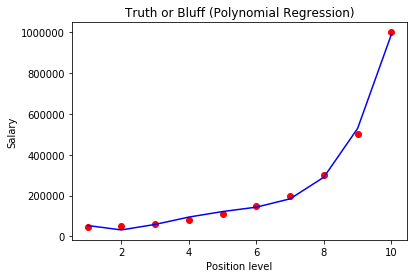

In [23]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

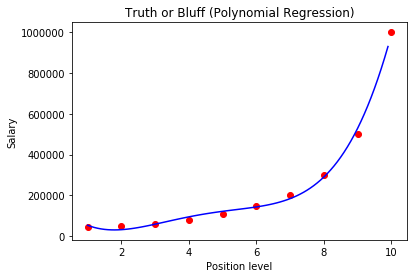

In [24]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Polynomial Reg line represent the relation bitween salary and Position level. Graph shows a good non linear polynomial curve